Importing the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

CIFAR data details link - http://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Explore the dataset

In [3]:
print("The shape of training dataset is", X_train.shape)
print("The shape of testing dataset is", X_test.shape)

The shape of training dataset is (50000, 32, 32, 3)
The shape of testing dataset is (10000, 32, 32, 3)


We can infer from above that there are 50000 training and 10000 testing color images of size 32*32 in this dataset.

In [4]:
print("The shape of training data labels is", y_train.shape)
print("The shape of testing data labels is", y_test.shape)

The shape of training data labels is (50000, 1)
The shape of testing data labels is (10000, 1)


In [5]:
print("The dimension of y_train is", y_train.ndim)
print("The dimension of y_test is", y_test.ndim)

The dimension of y_train is 2
The dimension of y_test is 2


In [6]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

We can infer form above that y_train is a 2D array. But, for our classification task at hand, a 1D array would suffice. So, we will now convert this 2D array to a 1D array.

In [7]:
print("Reshaping y_train and y_test")
y_train_1d = y_train.reshape(-1,)
y_test_1d = y_test.reshape(-1,)
print("The dimension of y_train now is", y_train_1d.ndim)
print("The dimension of y_test now is", y_test_1d.ndim)

Reshaping y_train and y_test
The dimension of y_train now is 1
The dimension of y_test now is 1


In [8]:
y_train_1d[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

From the dataset link, we could infer that here are 10 classes. Hence, defining an output labels variable, like below with the class names for easy interpretation.

In [9]:
output_class_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(output_class_labels[y[index]])

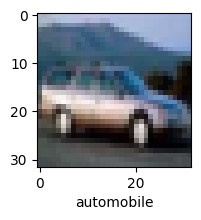

In [11]:
plot_sample(X_train,y_train_1d,4)

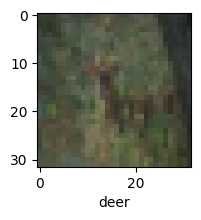

In [12]:
plot_sample(X_train,y_train_1d,10)

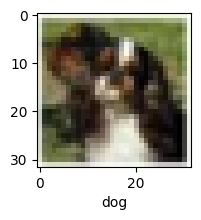

In [13]:
plot_sample(X_train,y_train_1d,500)

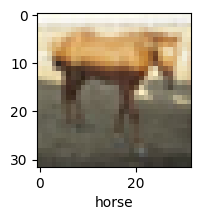

In [14]:
plot_sample(X_train,y_train_1d,2000)

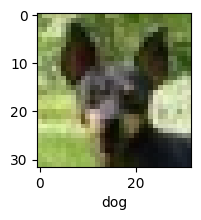

In [15]:
plot_sample(X_train,y_train_1d,2500)

Let's build a CNN model to classify the images

In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), activation= "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10,activation="softmax")

])

In [27]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
cnn_training = cnn.fit(X_train,y_train_1d, epochs=5, validation_split = 0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 40ms/step - accuracy: 0.2701 - loss: 4.2530 - val_accuracy: 0.4614 - val_loss: 1.4845
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.4875 - loss: 1.4250 - val_accuracy: 0.5397 - val_loss: 1.2921
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.5600 - loss: 1.2356 - val_accuracy: 0.5534 - val_loss: 1.2668
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.6130 - loss: 1.1006 - val_accuracy: 0.5772 - val_loss: 1.2148
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.6380 - loss: 1.0189 - val_accuracy: 0.5824 - val_loss: 1.2310


Post the session, train the model for 10 epochs and observe the output.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


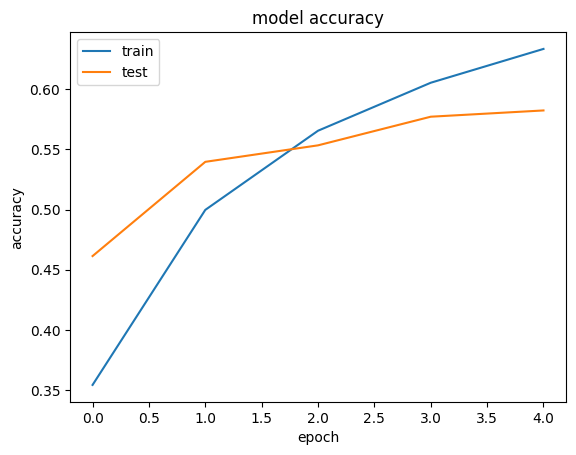

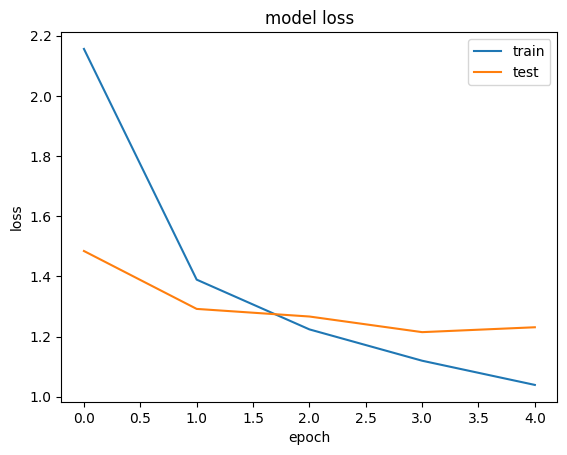

In [30]:
%matplotlib inline
# list all data in training
print(cnn_training.history.keys())
# summarize training for accuracy
plt.plot(cnn_training.history['accuracy']) # training accuracy values
plt.plot(cnn_training.history['val_accuracy']) #validation accuracy values
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(cnn_training.history['loss']) # training loss values
plt.plot(cnn_training.history['val_loss']) #validation loss values
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Evaluating the model on the test dataset

In [31]:
cnn.evaluate(X_test,y_test_1d)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5818 - loss: 1.2205


[1.2216109037399292, 0.5834000110626221]

We could infer from above that, when evaluated with the test dataset, the CNN model exhibits an accuracy of - 59%

In [32]:
y_test_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [34]:
y_test_pred[0]

array([0.01180176, 0.01504735, 0.01970119, 0.24073909, 0.00662822,
       0.04173931, 0.5725424 , 0.00110555, 0.07272486, 0.01797019],
      dtype=float32)

In [47]:
y_pred_classes = [int(np.argmax(element)) for element in y_test_pred]

In [48]:
type(y_pred_classes)

list

In [49]:
y_pred_classes[0]

6

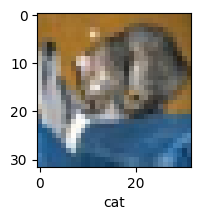

In [51]:
plot_sample(X_test,y_test_1d,0)

In [52]:
print("The predicted label for the above image is", output_class_labels[y_pred_classes[0]])

The predicted label for the above image is frog


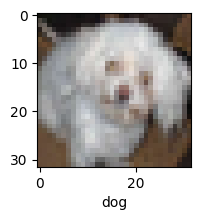

In [53]:
plot_sample(X_test,y_test_1d,1000)

In [54]:
print("The predicted label for the above image is", output_class_labels[y_pred_classes[1000]])

The predicted label for the above image is dog


**End of Section**